In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 5

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = True
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 16, 2)             0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 2)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 16)                1216      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                170       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
______________________________________________________

In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
25/25 [==============================] - 3s 42ms/step - loss: 1.6051 - accuracy: 0.3379 - val_loss: 1.5826 - val_accuracy: 0.3876

Epoch 00001: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 2/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5770 - accuracy: 0.3888 - val_loss: 1.5424 - val_accuracy: 0.3876

Epoch 00002: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 3/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5315 - accuracy: 0.3609 - val_loss: 1.4243 - val_accuracy: 0.3876

Epoch 00003: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 4/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.4438 - accuracy: 0.3294 - val_loss: 1.3324 - val_accuracy: 0.3876

Epoch 00004: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 5/1000
25/25 [==============================] - 0s 7ms/step -

25/25 [==============================] - 0s 6ms/step - loss: 0.7881 - accuracy: 0.6354 - val_loss: 0.6507 - val_accuracy: 0.6870

Epoch 00036: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 37/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.7217 - accuracy: 0.6493 - val_loss: 0.6474 - val_accuracy: 0.6822

Epoch 00037: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 38/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.7642 - accuracy: 0.6281 - val_loss: 0.6291 - val_accuracy: 0.7064

Epoch 00038: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 39/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.7434 - accuracy: 0.6409 - val_loss: 0.6765 - val_accuracy: 0.6744

Epoch 00039: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 40/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.7

25/25 [==============================] - 0s 6ms/step - loss: 0.5997 - accuracy: 0.7488 - val_loss: 0.4482 - val_accuracy: 0.8023

Epoch 00071: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 72/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.5770 - accuracy: 0.7366 - val_loss: 0.4585 - val_accuracy: 0.7955

Epoch 00072: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 73/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.5517 - accuracy: 0.7578 - val_loss: 0.4305 - val_accuracy: 0.8043

Epoch 00073: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 74/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.5973 - accuracy: 0.7584 - val_loss: 0.4389 - val_accuracy: 0.8043

Epoch 00074: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 75/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.5

25/25 [==============================] - 0s 6ms/step - loss: 0.4373 - accuracy: 0.8136 - val_loss: 0.3223 - val_accuracy: 0.8566

Epoch 00106: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 107/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4361 - accuracy: 0.8288 - val_loss: 0.3187 - val_accuracy: 0.8537

Epoch 00107: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 108/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4368 - accuracy: 0.8179 - val_loss: 0.3249 - val_accuracy: 0.8547

Epoch 00108: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 109/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4500 - accuracy: 0.8116 - val_loss: 0.3121 - val_accuracy: 0.8566

Epoch 00109: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 110/1000
25/25 [==============================] - 0s 8ms/step - loss:

25/25 [==============================] - 0s 6ms/step - loss: 0.3635 - accuracy: 0.8499 - val_loss: 0.2460 - val_accuracy: 0.8886

Epoch 00141: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 142/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.3564 - accuracy: 0.8451 - val_loss: 0.2416 - val_accuracy: 0.8905

Epoch 00142: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 143/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.3315 - accuracy: 0.8572 - val_loss: 0.2397 - val_accuracy: 0.8895

Epoch 00143: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 144/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.3268 - accuracy: 0.8711 - val_loss: 0.2429 - val_accuracy: 0.8905

Epoch 00144: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 145/1000
25/25 [==============================] - 0s 6ms/step - loss:

Epoch 176/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.2986 - accuracy: 0.8839 - val_loss: 0.1954 - val_accuracy: 0.9399

Epoch 00176: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 177/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.2749 - accuracy: 0.8852 - val_loss: 0.1900 - val_accuracy: 0.9419

Epoch 00177: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 178/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.2976 - accuracy: 0.8812 - val_loss: 0.1897 - val_accuracy: 0.9428

Epoch 00178: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 179/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.2882 - accuracy: 0.8882 - val_loss: 0.1845 - val_accuracy: 0.9322

Epoch 00179: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 180/1000
25/25 [==============================] - 0s 6

Epoch 211/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1785 - accuracy: 0.9408 - val_loss: 0.0893 - val_accuracy: 0.9709

Epoch 00211: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 212/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.2013 - accuracy: 0.9390 - val_loss: 0.0886 - val_accuracy: 0.9719

Epoch 00212: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 213/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1791 - accuracy: 0.9401 - val_loss: 0.0840 - val_accuracy: 0.9758

Epoch 00213: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 214/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1804 - accuracy: 0.9457 - val_loss: 0.0821 - val_accuracy: 0.9719

Epoch 00214: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 215/1000
25/25 [==============================] - 0s 6

Epoch 246/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1475 - accuracy: 0.9559 - val_loss: 0.0446 - val_accuracy: 0.9874

Epoch 00246: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 247/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1355 - accuracy: 0.9608 - val_loss: 0.0442 - val_accuracy: 0.9884

Epoch 00247: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 248/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1319 - accuracy: 0.9584 - val_loss: 0.0461 - val_accuracy: 0.9874

Epoch 00248: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 249/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1310 - accuracy: 0.9606 - val_loss: 0.0406 - val_accuracy: 0.9884

Epoch 00249: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 250/1000
25/25 [==============================] - 0s 6

25/25 [==============================] - 0s 6ms/step - loss: 0.1015 - accuracy: 0.9670 - val_loss: 0.0386 - val_accuracy: 0.9893

Epoch 00281: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 282/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0998 - accuracy: 0.9668 - val_loss: 0.0356 - val_accuracy: 0.9903

Epoch 00282: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 283/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1013 - accuracy: 0.9674 - val_loss: 0.0334 - val_accuracy: 0.9903

Epoch 00283: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 284/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0902 - accuracy: 0.9727 - val_loss: 0.0333 - val_accuracy: 0.9913

Epoch 00284: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 285/1000
25/25 [==============================] - 0s 6ms/step - loss:

25/25 [==============================] - 0s 6ms/step - loss: 0.0993 - accuracy: 0.9671 - val_loss: 0.0336 - val_accuracy: 0.9913

Epoch 00316: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 317/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1164 - accuracy: 0.9661 - val_loss: 0.0331 - val_accuracy: 0.9913

Epoch 00317: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 318/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0943 - accuracy: 0.9732 - val_loss: 0.0284 - val_accuracy: 0.9913

Epoch 00318: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 319/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0990 - accuracy: 0.9714 - val_loss: 0.0288 - val_accuracy: 0.9913

Epoch 00319: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 320/1000
25/25 [==============================] - 0s 6ms/step - loss:

25/25 [==============================] - 0s 6ms/step - loss: 0.0769 - accuracy: 0.9733 - val_loss: 0.0241 - val_accuracy: 0.9942

Epoch 00351: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 352/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0985 - accuracy: 0.9721 - val_loss: 0.0266 - val_accuracy: 0.9913

Epoch 00352: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 353/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0776 - accuracy: 0.9736 - val_loss: 0.0275 - val_accuracy: 0.9922

Epoch 00353: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 354/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0847 - accuracy: 0.9739 - val_loss: 0.0249 - val_accuracy: 0.9932

Epoch 00354: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 355/1000
25/25 [==============================] - 0s 6ms/step - loss:

25/25 [==============================] - 0s 6ms/step - loss: 0.0815 - accuracy: 0.9795 - val_loss: 0.0227 - val_accuracy: 0.9942

Epoch 00386: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 387/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0674 - accuracy: 0.9820 - val_loss: 0.0239 - val_accuracy: 0.9942

Epoch 00387: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 388/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0655 - accuracy: 0.9821 - val_loss: 0.0226 - val_accuracy: 0.9932

Epoch 00388: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 389/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0824 - accuracy: 0.9814 - val_loss: 0.0229 - val_accuracy: 0.9942

Epoch 00389: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 390/1000
25/25 [==============================] - 0s 6ms/step - loss:

25/25 [==============================] - 0s 6ms/step - loss: 0.0569 - accuracy: 0.9845 - val_loss: 0.0213 - val_accuracy: 0.9942

Epoch 00421: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 422/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0648 - accuracy: 0.9812 - val_loss: 0.0218 - val_accuracy: 0.9922

Epoch 00422: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 423/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0913 - accuracy: 0.9761 - val_loss: 0.0209 - val_accuracy: 0.9942

Epoch 00423: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 424/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0607 - accuracy: 0.9803 - val_loss: 0.0218 - val_accuracy: 0.9932

Epoch 00424: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 425/1000
25/25 [==============================] - 0s 6ms/step - loss:

25/25 [==============================] - 0s 6ms/step - loss: 0.0595 - accuracy: 0.9850 - val_loss: 0.0184 - val_accuracy: 0.9961

Epoch 00456: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 457/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0700 - accuracy: 0.9813 - val_loss: 0.0195 - val_accuracy: 0.9952

Epoch 00457: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 458/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0646 - accuracy: 0.9782 - val_loss: 0.0178 - val_accuracy: 0.9971

Epoch 00458: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 459/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0590 - accuracy: 0.9795 - val_loss: 0.0177 - val_accuracy: 0.9961

Epoch 00459: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 460/1000
25/25 [==============================] - 0s 6ms/step - loss:

25/25 [==============================] - 0s 6ms/step - loss: 0.0597 - accuracy: 0.9821 - val_loss: 0.0184 - val_accuracy: 0.9961

Epoch 00491: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 492/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0655 - accuracy: 0.9844 - val_loss: 0.0176 - val_accuracy: 0.9961

Epoch 00492: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 493/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0548 - accuracy: 0.9880 - val_loss: 0.0176 - val_accuracy: 0.9971

Epoch 00493: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 494/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0621 - accuracy: 0.9802 - val_loss: 0.0193 - val_accuracy: 0.9961

Epoch 00494: saving model to model/point_history_classifier/point_history_classifier.hdf5
Epoch 495/1000
25/25 [==============================] - 0s 6ms/step - loss:

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.9978036e-01 1.6779331e-05 4.4076438e-05 7.1831011e-05 8.6850152e-05]
0


# 混同行列

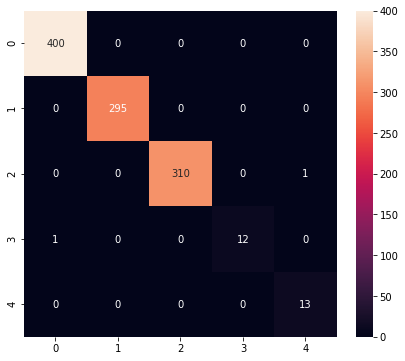

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       295
           2       1.00      1.00      1.00       311
           3       1.00      0.92      0.96        13
           4       0.93      1.00      0.96        13

    accuracy                           1.00      1032
   macro avg       0.99      0.98      0.98      1032
weighted avg       1.00      1.00      1.00      1032



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/sp/2t1914v93yb49zbkfxghzhdw0000gn/T/tmp2r471zgg/assets


INFO:tensorflow:Assets written to: /var/folders/sp/2t1914v93yb49zbkfxghzhdw0000gn/T/tmp2r471zgg/assets


14752

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 927 µs, sys: 1.24 ms, total: 2.16 ms
Wall time: 3.81 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9980396e-01 1.4081803e-05 4.4337772e-05 6.2844789e-05 7.4804047e-05]
0
